# Understanding How Images are Read By a Computer

This Jupyter notebook gives a clear and simple understanding of how images are read by a computer, what makes an image and how they are fed into machine learning algorithms. Images are seen everywhere on the internet, from our social media feeds to online images from Google. I've always wondered how a computer displays an image so I created this Jupyter notebook to explain the digital process.

We will do the following: 

 - Define a digital image and pixel 
 - Understand color channels and what they are 
 - Pixels and how they are stored
 - Create an image from scratch



In [1]:
#import some packages

import os

import numpy as np 
import pandas as pd

import cv2
import matplotlib.pyplot as plt
from PIL import Image, ImageOps

### What is a Digital Image?

Before we get started, it's important to have a basic understanding of what makes a digital image and what it is. 

   - Digital image - pixels organized on an X-Y coordinate grid. 

   - Pixel - is a small square that has only one color in it. An image is made of thousands and thousands of pixels.

So now that we know what a digital image and a pixel is. Let's work with an example.


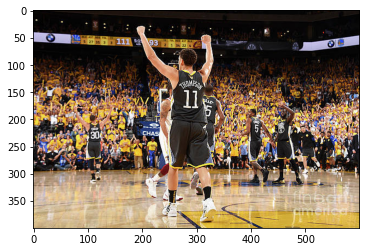

Shape: (400, 600, 3)
Format: JPEG - RGB


In [2]:
#let's bring in a picture, here is a picture of Klay Thompson raising his hands up on a basketball court

path = '/Users/matthew_macwan/Downloads/CIS/U_Image_Data/image1.jpeg'

pic_2 = cv2.cvtColor(cv2.imread(path), cv2.COLOR_BGR2RGB)
plt.imshow(pic_2)
plt.show()

#let's view some data about this image

md = Image.open(path)

print('Shape:',cv2.imread(path).shape)
print('Format:', md.format,'-', md.mode)

Let's try to make sense of the shape and format data outputted.

#### SHAPE

   - Shape is telling us that this image is made of 400 pixels along the (X-axis) by 600 pixels along the (Y-axis) with a depth of 3. So if we wanted to know how many indiviudal pixels in took to display this image, we just have to mutiply 400 x 600 which gives us 24,000 pixels making up this one image. You may be a bit confused as to why a 2-D Image has 3 Dimensionals, we will cover that next.
 
#### FORMAT 
   - The format is RGB, which stands red, green, and blue channels. Every color image is made up of these 3 color channels and that is what the depth of 3 represents, the 3 color channels.
   
Let's take look at the 3 color channels. 

### RGB Channels

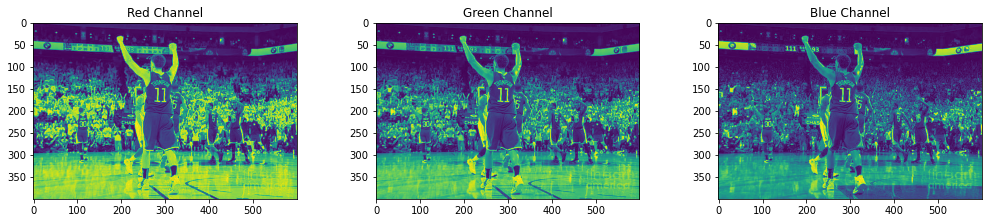

In [3]:
#Splitting into 3 channels 

red, green, blue = cv2.split(pic_2)

# Plotting the 3 channels

fig = plt.figure(figsize = (17, 8.2))
fig.subplots_adjust(hspace=0.3, wspace=0.3)

fig.add_subplot(1,3,1)
plt.title("Red Channel")
plt.imshow(red)

fig.add_subplot(1,3,2)
plt.title("Green Channel")
plt.imshow(green)

fig.add_subplot(1,3,3)
plt.title("Blue Channel")
plt.imshow(blue)


#### Understanding Red, Green and Blue Channels 

 - There are various different color modes for pictures out there such as grayscale, CMYK, Lab, etc. One of these color modes is RGB and it is one of the most popular ones for displaying color on a computer.

#### Why RGB?

 - Red, Green and Blue are the three colors of light and that means that all the colors we see are made up of some combination of these three colors.
    

    
If we merge, these 3 channels together, we will get the orginal image. 



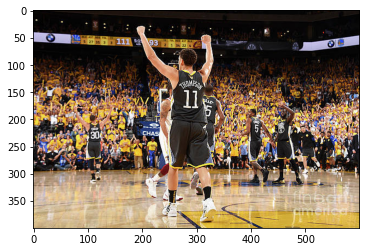

In [4]:
#merging the image back together 

original_image = cv2.merge((red, green, blue))
plt.imshow(original_image)
plt.show()

### How are the Pixels Stored? 

 - It may or may not be obvious that in order a computer or an algorithm to use data, it needs to be converted into a numerical format. Let's see how each of the 3 channels are stored.

In [5]:
red

array([[  8,   8,   8, ...,  22,  22,  22],
       [  8,   8,   8, ...,  23,  24,  25],
       [ 10,  10,  10, ...,  25,  26,  27],
       ...,
       [207, 214, 217, ..., 199, 201, 202],
       [207, 212, 211, ..., 205, 205, 205],
       [208, 210, 207, ..., 213, 210, 208]], dtype=uint8)

In [6]:
red.shape

(400, 600)

In [7]:
green

array([[  7,   7,   7, ...,  17,  17,  17],
       [  7,   7,   7, ...,  18,  19,  20],
       [  9,   9,   9, ...,  20,  21,  22],
       ...,
       [179, 186, 189, ..., 163, 165, 166],
       [179, 184, 183, ..., 171, 171, 171],
       [180, 182, 179, ..., 181, 177, 175]], dtype=uint8)

In [8]:
green.shape

(400, 600)

In [9]:
blue

array([[  5,   5,   5, ...,  14,  14,  14],
       [  5,   5,   5, ...,  15,  16,  17],
       [  7,   7,   7, ...,  17,  18,  19],
       ...,
       [131, 138, 141, ...,  66,  68,  70],
       [131, 136, 135, ...,  63,  64,  64],
       [132, 134, 131, ...,  62,  61,  59]], dtype=uint8)

In [10]:
blue.shape

(400, 600)

 - Each color channel is a 2-dimensional array made up of numbers that go from 0-255. 
 
 
 - Each pixel is represented by a single number in each of the 2-dimensional arrays.
 
 
 - The numbers 0-255 represents the brightness or intensity of the particular pixel in each channel (Red, Green or Blue) with 255 being the most intense and 0 being no brightness at all.
 
 
 - Since we know that red, green and blue make up any color we see, mixing these 3 arrays allows us to display any color. 
 
Let's take look at a simple example to gain a further understanding.

### Digital Image of a Black Square vs White Square

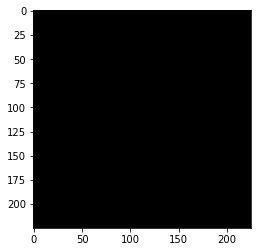

Shape: (225, 225, 3)
Format: PNG - P


In [11]:
#BLACK IMAGE

path = '/Users/matthew_macwan/Downloads/CIS/U_Image_Data/black'

black = cv2.imread(path,cv2.IMREAD_UNCHANGED)
plt.imshow(black)
plt.show()

md = Image.open(path)

print('Shape:',cv2.imread(path).shape)
print('Format:', md.format,'-', md.mode)

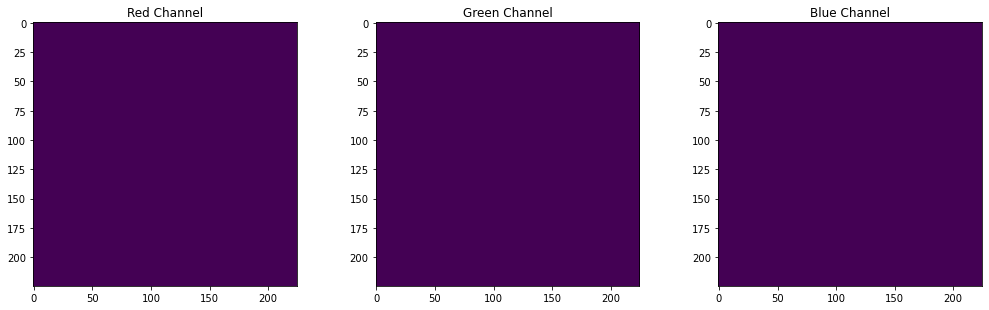

In [12]:
#let's split the image into 3 channels 

#Splitting into 3 channels 

red, green, blue = cv2.split(black)

# Plotting the 3 channels

fig = plt.figure(figsize = (17, 8.2))
fig.subplots_adjust(hspace=0.3, wspace=0.3)

fig.add_subplot(1,3,1)
plt.title("Red Channel")
plt.imshow(red)

fig.add_subplot(1,3,2)
plt.title("Green Channel")
plt.imshow(green)

fig.add_subplot(1,3,3)
plt.title("Blue Channel")
plt.imshow(blue)

In [13]:
red

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

In [14]:
green

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

In [15]:
blue

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

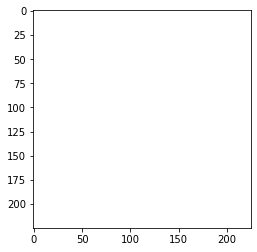

Shape: (225, 225, 3)
Format: PNG - P


In [16]:
#WHITE IMAGE

path = '/Users/matthew_macwan/Downloads/CIS/U_Image_Data/white'

white = cv2.imread(path,cv2.IMREAD_UNCHANGED)
plt.imshow(white)
plt.show()

md = Image.open(path)

print('Shape:',cv2.imread(path).shape)
print('Format:', md.format,'-', md.mode)

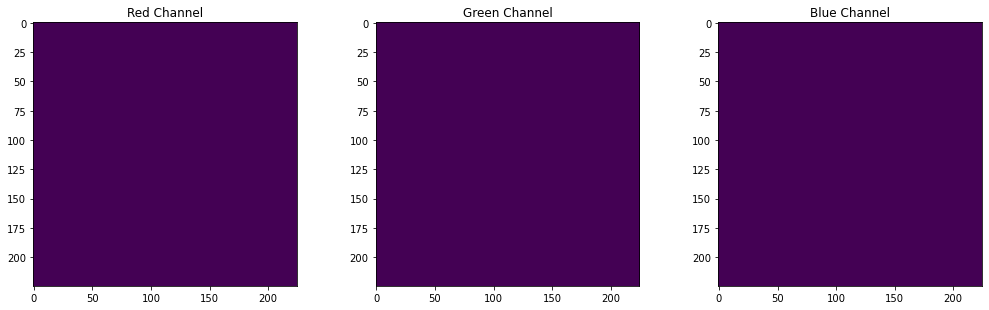

In [17]:
#let's split the image into 3 channels 

#Splitting into 3 channels 

red, green, blue = cv2.split(white)

# Plotting the 3 channels

fig = plt.figure(figsize = (17, 8.2))
fig.subplots_adjust(hspace=0.3, wspace=0.3)

fig.add_subplot(1,3,1)
plt.title("Red Channel")
plt.imshow(red)

fig.add_subplot(1,3,2)
plt.title("Green Channel")
plt.imshow(green)

fig.add_subplot(1,3,3)
plt.title("Blue Channel")
plt.imshow(blue)

In [18]:
red

array([[255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       ...,
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255]], dtype=uint8)

In [19]:
green

array([[255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       ...,
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255]], dtype=uint8)

In [20]:
blue

array([[255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       ...,
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255]], dtype=uint8)

 - 0 in each RGB channel represents black  (no light)
 - 255 in each RGB channel represents white (maximum light)
 
 
 - Essentially, any color can be encoded as 3 numbers in an array

### Creating a Color Image from Scratch

- Yellow is made by mixing red and green, so let's make some arrays and merge them to create a yellow square. 
- By making red and green = 255, and blue = 0. This should create the color yellow.

In [21]:
#create the RGB channel arrays

red = np.full((12, 12), 255)
green = np.full((12, 12), 255)
blue = np.full((12, 12), 0)

In [22]:
red

array([[255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255],
       [255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255],
       [255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255],
       [255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255],
       [255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255],
       [255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255],
       [255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255],
       [255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255],
       [255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255],
       [255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255],
       [255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255],
       [255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255]])

In [23]:
green

array([[255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255],
       [255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255],
       [255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255],
       [255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255],
       [255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255],
       [255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255],
       [255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255],
       [255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255],
       [255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255],
       [255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255],
       [255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255],
       [255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255]])

In [24]:
blue

array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]])

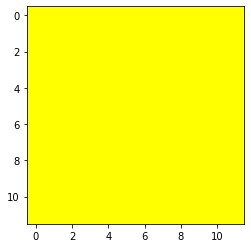

In [25]:
#merging the arrays back together

yellow = cv2.merge((red, green, blue))
plt.imshow(yellow)
plt.show()

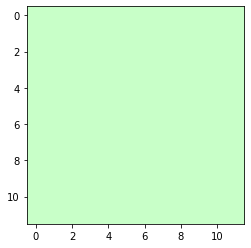

In [26]:
#let's make a more unique color such as pastel green

#create the RGB channel arrays

red = np.full((12, 12), 200)
green = np.full((12, 12), 255)
blue = np.full((12, 12), 200)

#merging the arrays back together

p_green = cv2.merge((red, green, blue))
plt.imshow(p_green)
plt.show()